In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## unzipping the files
from zipfile import ZipFile

def unzip_files(file,output_dir):
  with ZipFile(file, 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall(output_dir)
  print('Extracted to',output_dir)

def make_directory(directory):
  if os.path.isdir(directory):
    shutil.rmtree(directory)
  
  os.mkdir(directory)
  print('Created a new directory')

training_data_zip = '/content/drive/My Drive/Colab Notebooks/padh.ai.notebooks/15. Object Detection/Scene Text Detection Dataset/English and Hindi MLT 2019.zip'

In [4]:
# make directories
make_directory('Training Set')

Created a new directory


In [5]:
%%time
unzip_files(training_data_zip,'Training Set')

Extracted to Training Set
CPU times: user 2.55 s, sys: 1.29 s, total: 3.84 s
Wall time: 19.9 s


In [0]:
image_folder = '/content/Training Set/Images'
annotation_folder = '/content/Training Set/Annotations'

In [0]:
def extract_vertices(label_file, split_char=','):
  labels = []
  vertices = []
  with open(label_file,'r') as txtfile:
    for line in txtfile.readlines():
      float_list = list(map(float,line.rstrip('\n').lstrip('\ufeff').split(split_char)[:8]))
      round_list = list(map(np.ceil,float_list))
      x1,y1,x2,y2,x3,y3,x4,y4 = list(map(int,round_list))
      vertices.append([x1,y1,x2,y2,x3,y3,x4,y4])
      label = 1 if "##" not in line else 0  # ignore text containing ## 
      labels.append(label)
  
  return np.array(vertices), np.array(labels)

##plotting
def plot_random_image(image_folder, annotation_folder):
  image_files = sorted(os.listdir(image_folder))
  annotation_files = sorted(os.listdir(annotation_folder))
  print('Total files in Image folder',len(image_files), '| Total files in Annotation folder',len(annotation_files))
  index = np.random.randint(low=1,high=len(image_files)+1)
  img_file, label_file = os.path.join(image_folder, image_files[index]), os.path.join(annotation_folder,annotation_files[index])
  vertices, labels = extract_vertices(label_file)
  vertices = vertices.reshape(-1,4,2)
  
  plt.figure(figsize=(15,10))
  img = np.array(Image.open(img_file))
  cv2.polylines(img,vertices,isClosed=True,color=(0,255,255),thickness=2)
  plt.imshow(img)
  plt.show()

Total files in Image folder 2000 | Total files in Annotation folder 2000


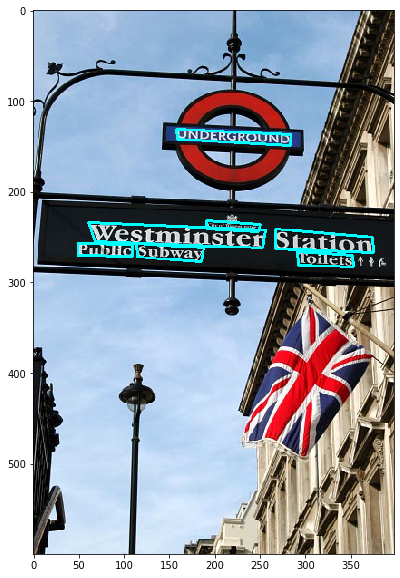

In [32]:
plot_random_image(image_folder, annotation_folder)